In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
#pip install tensorflow==2.17.0

In [4]:
pip show tensorflow

Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\ridmi\desktop\assignment\kasun\dish id\venv\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
import sys 
print(sys.executable)

c:\Users\ridmi\Desktop\Assignment\Kasun\Dish ID\venv\Scripts\python.exe


In [4]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
BATCH_SIZE = 32

In [5]:
import os
import shutil
import random

# Paths for the original dataset and new train/val folders
original_dataset_path = r'..\Data\Indian'  
train_path = r'..\Data\train'  
val_path = r'..\Data\val'  

# Ratio for the training set
train_ratio = 0.8  # 80% for training, 20% for validation

# Create train and validation folders if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Go through each class subfolder in the original dataset
for class_name in os.listdir(original_dataset_path):
    class_path = os.path.join(original_dataset_path, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        random.shuffle(images)

        # Split images into train and validation
        train_size = int(len(images) * train_ratio)
        train_images = images[:train_size]
        val_images = images[train_size:]

        # Create subfolders in train and val for each class
        train_class_path = os.path.join(train_path, class_name)
        val_class_path = os.path.join(val_path, class_name)
        os.makedirs(train_class_path, exist_ok=True)
        os.makedirs(val_class_path, exist_ok=True)

        # Move images to the respective folders
        for img in train_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(train_class_path, img))

        for img in val_images:
            shutil.copy(os.path.join(class_path, img), os.path.join(val_class_path, img))

print("Dataset has been split into train and validation sets.")


Dataset has been split into train and validation sets.


In [6]:
train_dataset_path= r'..\Data\train'

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 2799 images belonging to 9 classes.


In [7]:
validation_dataset_path = r'..\Data\val'

validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 1880 images belonging to 9 classes.


In [8]:
# Load the MobileNetV2 model pre-trained on ImageNet, without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [9]:
# Freeze the base model layers
base_model.trainable = False

In [10]:
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [11]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

C:\Users\ridmi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5055 - loss: 1.5310

C:\Users\ridmi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step - accuracy: 0.5072 - loss: 1.5264 - val_accuracy: 0.8160 - val_loss: 0.6481
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.8271 - loss: 0.5892 - val_accuracy: 0.8559 - val_loss: 0.4868
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.8518 - loss: 0.4820 - val_accuracy: 0.8819 - val_loss: 0.3923
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.8747 - loss: 0.4147 - val_accuracy: 0.8926 - val_loss: 0.3549
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 231s 3s/step - accuracy: 0.8920 - loss: 0.3617 - val_accuracy: 0.9133 - val_loss: 0.3050
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 241s 3s/step - accuracy: 0.8980 - loss: 0.3358 - val_accuracy: 0.9229 - val_loss: 0.2779
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.9047 - loss: 0.3115 - val_accuracy: 0.9309 - val_loss: 0.2484
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.9153 - loss: 0.2814 - val_accuracy: 0.9181 - val_loss: 0.

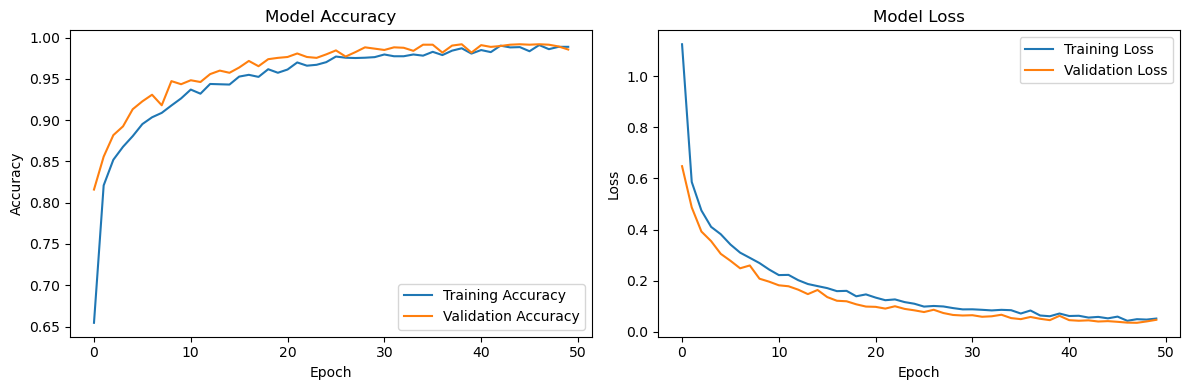

In [14]:
# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [15]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

59/59 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9919 - loss: 0.0369
Validation Accuracy: 99.15%


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9877 - loss: 0.0488
Epoch 1: val_accuracy improved from -inf to 0.99415, saving model to best_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 281s 3s/step - accuracy: 0.9877 - loss: 0.0488 - val_accuracy: 0.9941 - val_loss: 0.0312 - learning_rate: 1.0000e-06
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9878 - loss: 0.0520
Epoch 2: val_accuracy did not improve from 0.99415
88/88 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.9879 - loss: 0.0520 - val_accuracy: 0.9936 - val_loss: 0.0304 - learning_rate: 1.0000e-06
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9944 - loss: 0.0338
Epoch 3: val_accuracy did not improve from 0.99415
88/88 ━━━━━━━━━━━━━━━━━━━━ 276s 3s/step - accuracy: 0.9943 - loss: 0.0338 - val_accuracy: 0.9936 - val_loss: 0.0301 - learning_rate: 1.0000e-06
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9946 - loss: 0.0332
Epoch 4: val_accuracy did not improve from 0.994

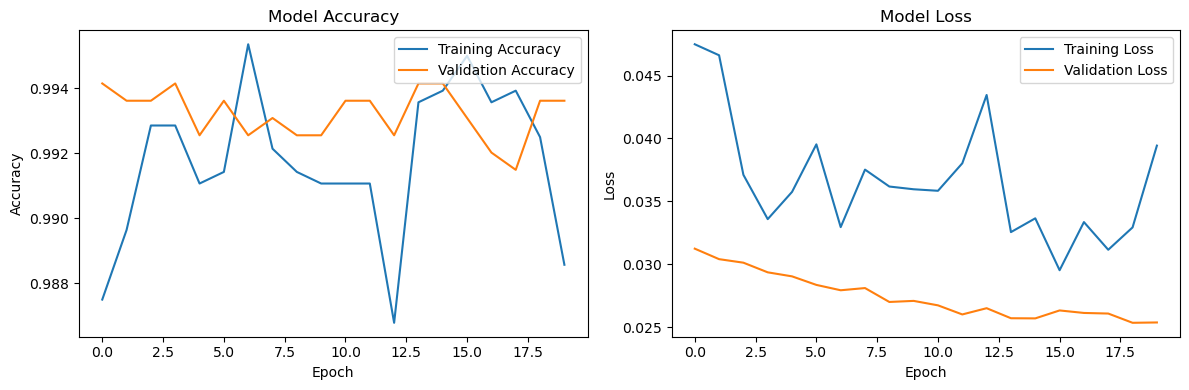

In [17]:
# Create the final model
model2 = Model(inputs=base_model.input, outputs=predictions)

# Fine-tuning: Unfreeze some of the base model layers and retrain
base_model.trainable = False  # Start by freezing the entire base model

# Selectively unfreeze the last 5 layers (excluding BatchNormalization layers)
for layer in base_model.layers[-5:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True
        
# Compile the model after adjusting trainable layers
model2.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: Add learning rate scheduler and checkpointing
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1
)
callbacks = [early_stopping, lr_scheduler, checkpoint]

# Continue training
history = model2.fit(
    train_generator,
    epochs=20,  # Start with fewer epochs
    validation_data=validation_generator,
    callbacks=callbacks
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [18]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model2.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

59/59 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9939 - loss: 0.0269
Validation Accuracy: 99.36%


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9893 - loss: 0.0352
Epoch 1: val_accuracy improved from -inf to 0.99362, saving model to best_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.9893 - loss: 0.0352 - val_accuracy: 0.9936 - val_loss: 0.0251 - learning_rate: 1.0000e-06
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9943 - loss: 0.0304
Epoch 2: val_accuracy improved from 0.99362 to 0.99468, saving model to best_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.9943 - loss: 0.0304 - val_accuracy: 0.9947 - val_loss: 0.0246 - learning_rate: 1.0000e-06
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9933 - loss: 0.0321
Epoch 3: val_accuracy did not improve from 0.99468
88/88 ━━━━━━━━━━━━━━━━━━━━ 234s 3s/step - accuracy: 0.9933 - loss: 0.0321 - val_accuracy: 0.9941 - val_loss: 0.0250 - learning_rate: 1.0000e-06
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9925 - loss: 0.0319
Epoch 4: v

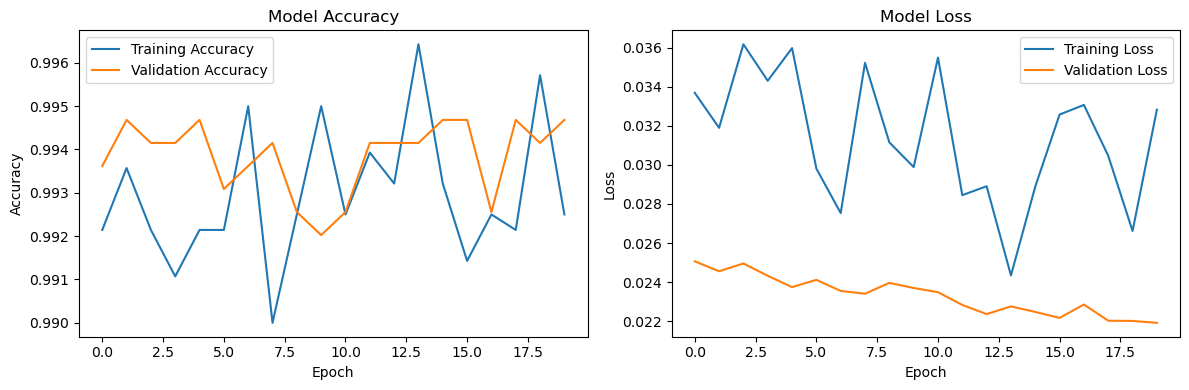

In [19]:
# Create the final model
model3 = Model(inputs=base_model.input, outputs=predictions)

# Fine-tuning: Unfreeze some of the base model layers and retrain
base_model.trainable = False  # Start by freezing the entire base model

# Selectively unfreeze the last 10 layers (excluding BatchNormalization layers)
for layer in base_model.layers[-10:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Compile the model after adjusting trainable layers
model3.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: Add learning rate scheduler and checkpointing
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1
)
callbacks = [early_stopping, lr_scheduler, checkpoint]

# Continue training
history = model3.fit(
    train_generator,
    epochs=20,  # Start with fewer epochs
    validation_data=validation_generator,
    callbacks=callbacks
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [20]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model3.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

59/59 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9942 - loss: 0.0212
Validation Accuracy: 99.47%


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9934 - loss: 0.0289
Epoch 1: val_accuracy improved from -inf to 0.99202, saving model to best_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.9934 - loss: 0.0289 - val_accuracy: 0.9920 - val_loss: 0.0229 - learning_rate: 1.0000e-06
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9935 - loss: 0.0267
Epoch 2: val_accuracy did not improve from 0.99202
88/88 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.9935 - loss: 0.0267 - val_accuracy: 0.9920 - val_loss: 0.0231 - learning_rate: 1.0000e-06
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9919 - loss: 0.0306
Epoch 3: val_accuracy improved from 0.99202 to 0.99362, saving model to best_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.9919 - loss: 0.0306 - val_accuracy: 0.9936 - val_loss: 0.0217 - learning_rate: 1.0000e-06
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9936 - loss: 0.0251
Epoch 4: v

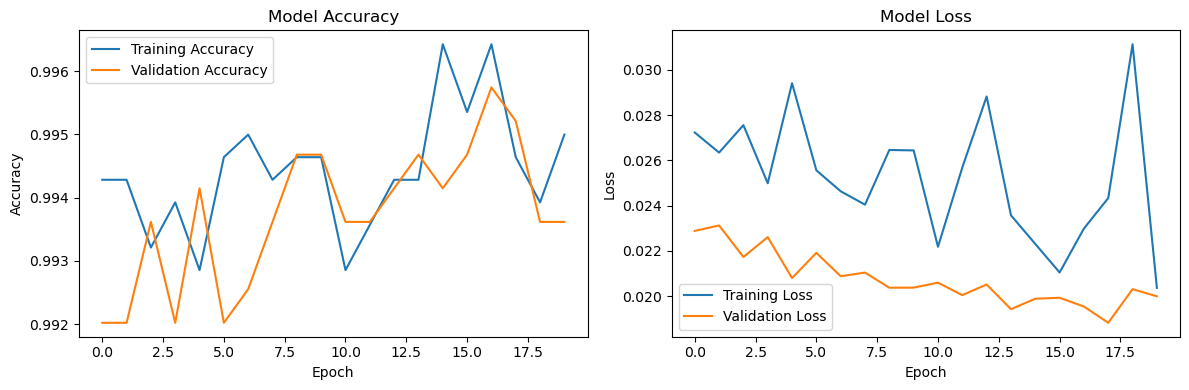

In [21]:
# Create the final model
model4 = Model(inputs=base_model.input, outputs=predictions)

# Fine-tuning: Unfreeze some of the base model layers and retrain
base_model.trainable = False  # Start by freezing the entire base model

# Selectively unfreeze the last 15 layers (excluding BatchNormalization layers)
for layer in base_model.layers[-15:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Compile the model after adjusting trainable layers
model4.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: Add learning rate scheduler and checkpointing
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1
)
callbacks = [early_stopping, lr_scheduler, checkpoint]

# Continue training
history = model4.fit(
    train_generator,
    epochs=20,  # Start with fewer epochs
    validation_data=validation_generator,
    callbacks=callbacks
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [22]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model4.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

59/59 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9965 - loss: 0.0146
Validation Accuracy: 99.52%


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9937 - loss: 0.0230
Epoch 1: saving model to best_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 258s 3s/step - accuracy: 0.9937 - loss: 0.0230 - val_accuracy: 0.9936 - val_loss: 0.0208 - learning_rate: 1.0000e-06
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9926 - loss: 0.0256
Epoch 2: saving model to best_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 274s 3s/step - accuracy: 0.9926 - loss: 0.0256 - val_accuracy: 0.9941 - val_loss: 0.0200 - learning_rate: 1.0000e-06
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9944 - loss: 0.0225
Epoch 3: saving model to best_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 284s 3s/step - accuracy: 0.9944 - loss: 0.0225 - val_accuracy: 0.9936 - val_loss: 0.0194 - learning_rate: 1.0000e-06
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9962 - loss: 0.0180
Epoch 4: saving model to best_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.9962 - loss: 0

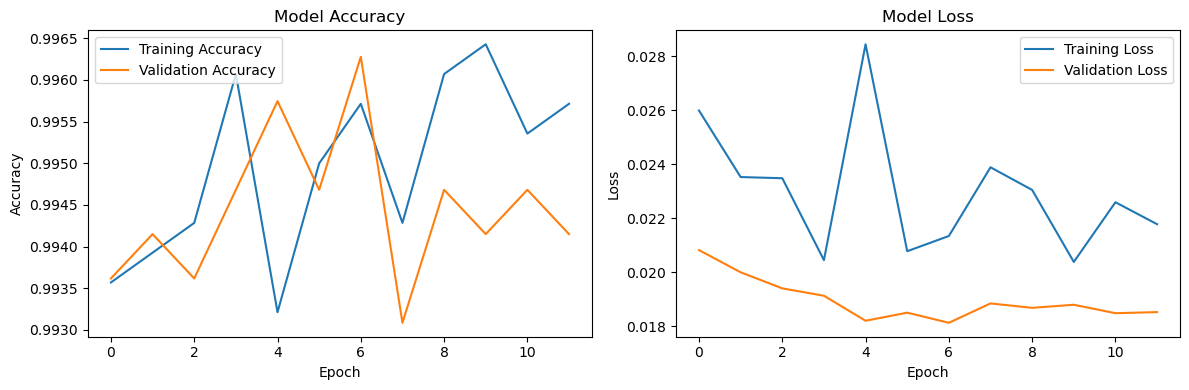

In [23]:
# Create the final model
model5 = Model(inputs=base_model.input, outputs=predictions)

# Fine-tuning: Unfreeze some of the base model layers and retrain
base_model.trainable = False  # Start by freezing the entire base model

# Selectively unfreeze the last 20 layers (excluding BatchNormalization layers)
for layer in base_model.layers[-20:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Compile the model after adjusting trainable layers
model5.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: Add learning rate scheduler and checkpointing
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras', monitor='val_accuracy', save_best_only=False, verbose=1
)
callbacks = [early_stopping, lr_scheduler, checkpoint]

# Continue training
history = model5.fit(
    train_generator,
    epochs=20,  # Start with fewer epochs
    validation_data=validation_generator,
    callbacks=callbacks
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [24]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model5.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

59/59 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9990 - loss: 0.0148
Validation Accuracy: 99.63%


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9904 - loss: 0.0289
Epoch 1: val_accuracy improved from -inf to 0.99362, saving model to best_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 273s 3s/step - accuracy: 0.9905 - loss: 0.0289 - val_accuracy: 0.9936 - val_loss: 0.0181 - learning_rate: 1.0000e-06
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9954 - loss: 0.0208
Epoch 2: val_accuracy did not improve from 0.99362
88/88 ━━━━━━━━━━━━━━━━━━━━ 474s 5s/step - accuracy: 0.9954 - loss: 0.0208 - val_accuracy: 0.9936 - val_loss: 0.0191 - learning_rate: 1.0000e-06
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9970 - loss: 0.0200
Epoch 3: val_accuracy improved from 0.99362 to 0.99468, saving model to best_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 418s 5s/step - accuracy: 0.9970 - loss: 0.0200 - val_accuracy: 0.9947 - val_loss: 0.0172 - learning_rate: 1.0000e-06
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9963 - loss: 0.0255
Epoch 4: v

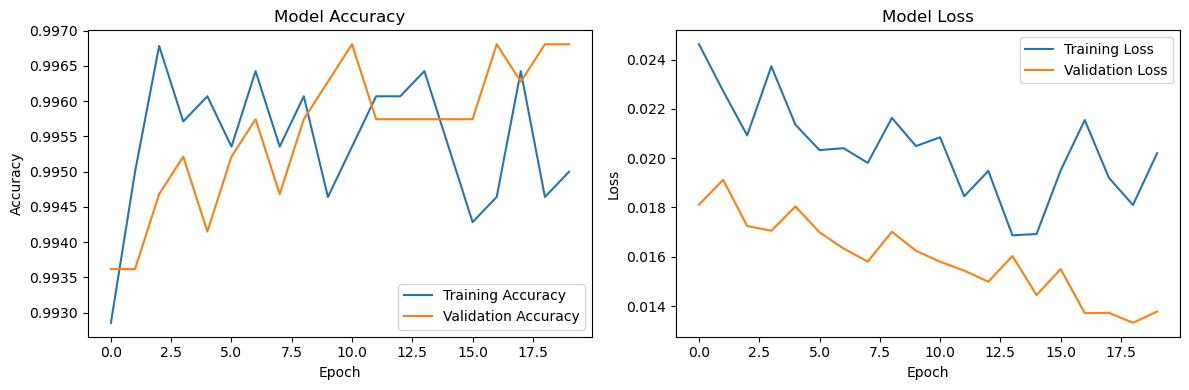

In [25]:
# Create the final model
model6 = Model(inputs=base_model.input, outputs=predictions)

# Fine-tuning: Unfreeze some of the base model layers and retrain
base_model.trainable = False  # Start by freezing the entire base model

# Selectively unfreeze the last 50 layers (excluding BatchNormalization layers)
for layer in base_model.layers[-50:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Compile the model after adjusting trainable layers
model6.compile(optimizer=Adam(learning_rate=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: Add learning rate scheduler and checkpointing
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1
)
callbacks = [early_stopping, lr_scheduler, checkpoint]

# Continue training
history = model6.fit(
    train_generator,
    epochs=20,  # Start with fewer epochs
    validation_data=validation_generator,
    callbacks=callbacks
)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [26]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model6.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

59/59 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9945 - loss: 0.0162
Validation Accuracy: 99.68%


In [ ]:
class_labels = train_generator.class_indices
print(class_labels)

In [27]:
model.save('dishid_model1.h5')

In [28]:
model2.save('dishid_model2.h5')

In [29]:
model3.save('dishid_model3.h5')

In [30]:
model4.save('dishid_model4.h5')

In [31]:
model5.save('dishid_model5.h5')

In [32]:
model6.save('dishid_model6.h5')